In [1]:
import pandas as pd
df = pd.read_csv("Titanic-Dataset.csv")

In [4]:
print(df.shape)
print(len(df))

(891, 12)
891


In [29]:
print(df.columns)
print(df.info())
print(df.head(20))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
    PassengerId  Survived  Pclass  \
0             1         0       3   
1           

In [73]:
aa = df['Sex'].value_counts()
print(aa)
print(aa.index)

Sex
male      577
female    314
Name: count, dtype: int64
Index(['male', 'female'], dtype='object', name='Sex')


In [10]:
print(df['Age'].max(skipna=True))

80.0


In [12]:
print(round(df['Age'].mean(skipna = True),2))

29.7


In [16]:
print(df['Fare'].mode(dropna = True))

0    8.05
Name: Fare, dtype: float64


In [25]:
older_passen = df[(df['Age'] > 70)]
print("Count of Old People:", len(older_passen))
older_passen[['Name', 'Age']]

Count of Old People: 5


,Name,Age
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
493,"Artagaveytia, Mr. Ramon",71.0
630,"Barkworth, Mr. Algernon Henry Wilson",80.0
851,"Svensson, Mr. Johan",74.0


In [28]:
dff = older_passen[['Name','Age']].sort_values(by='Name', ascending=True)
dff

,Name,Age
493,"Artagaveytia, Mr. Ramon",71.0
630,"Barkworth, Mr. Algernon Henry Wilson",80.0
116,"Connors, Mr. Patrick",70.5
96,"Goldschmidt, Mr. George B",71.0
851,"Svensson, Mr. Johan",74.0


In [34]:
dff = df.loc[(df['Sex'] == 'male') & (df['Embarked'] == 'S'),['PassengerId','Name']]
dff

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
4,5,"Allen, Mr. William Henry"
6,7,"McCarthy, Mr. Timothy J"
7,8,"Palsson, Master. Gosta Leonard"
12,13,"Saundercock, Mr. William Henry"
...,...,...
878,879,"Laleff, Mr. Kristo"
881,882,"Markun, Mr. Johann"
883,884,"Banfield, Mr. Frederick James"
884,885,"Sutehall, Mr. Henry Jr"


In [35]:
dff.head(20)

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
4,5,"Allen, Mr. William Henry"
6,7,"McCarthy, Mr. Timothy J"
7,8,"Palsson, Master. Gosta Leonard"
12,13,"Saundercock, Mr. William Henry"
13,14,"Andersson, Mr. Anders Johan"
17,18,"Williams, Mr. Charles Eugene"
20,21,"Fynney, Mr. Joseph J"
21,22,"Beesley, Mr. Lawrence"
23,24,"Sloper, Mr. William Thompson"


In [40]:
maxAge  = df['Age'].max(skipna=True)
oldest_surv = df.loc[(df['Age'] == maxAge),['Name','Age','Survived']]
oldest_surv

,Name,Age,Survived
630,"Barkworth, Mr. Algernon Henry Wilson",80.0,1


In [44]:
dff = df[df['Survived'] == 1].groupby('Pclass').size().rename("Survivors")
dff

Pclass
1    136
2     87
3    119
Name: Survivors, dtype: int64

In [45]:
dff = df.groupby(['Embarked','Sex'])['Fare'].mean()
dff

Embarked  Sex   
C         female    75.169805
          male      48.262109
Q         female    12.634958
          male      13.838922
S         female    38.740929
          male      21.711996
Name: Fare, dtype: float64

In [46]:
dff = df.groupby(['Pclass'])['Age'].mean()
dff

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [53]:
dff =  df.query("Age < 20")
dff['Name'].head(20)

7                    Palsson, Master. Gosta Leonard
9               Nasser, Mrs. Nicholas (Adele Achem)
10                  Sandstrom, Miss. Marguerite Rut
14             Vestrom, Miss. Hulda Amanda Adolfina
16                             Rice, Master. Eugene
22                      McGowan, Miss. Anna "Annie"
24                    Palsson, Miss. Torborg Danira
27                   Fortune, Mr. Charles Alexander
38               Vander Planke, Miss. Augusta Maria
39                      Nicola-Yarred, Miss. Jamila
43         Laroche, Miss. Simonne Marie Anne Andree
44                    Devaney, Miss. Margaret Delia
49    Arnold-Franchi, Mrs. Josef (Josefine Franchi)
50                       Panula, Master. Juha Niilo
58                     West, Miss. Constance Mirium
59               Goodwin, Master. William Frederick
63                            Skoog, Master. Harald
67                         Crease, Mr. Ernest James
68                  Andersson, Miss. Erna Alexandra
71          

In [54]:
dff = df.groupby(df['Pclass']).agg({
    "Age": ["mean","min"],
    "Fare":"max"
})

dff

Age            Fare
             mean   min       max
Pclass                           
1       38.233441  0.92  512.3292
2       29.877630  0.67   73.5000
3       25.140620  0.42   69.5500

Text(0, 0.5, 'Count')

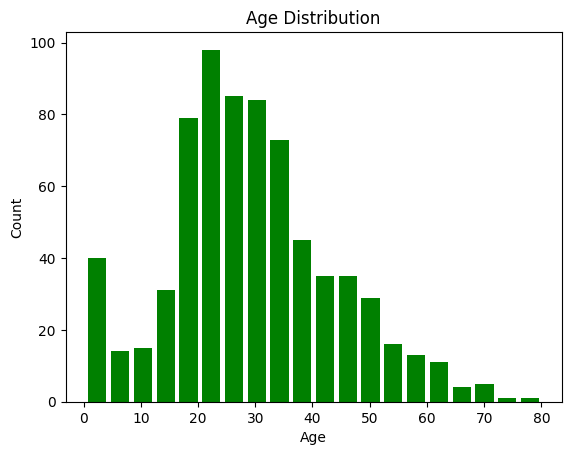

In [57]:
import matplotlib.pyplot as plt
df['Age'].plot.hist(bins=20, color="green", rwidth=0.8)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

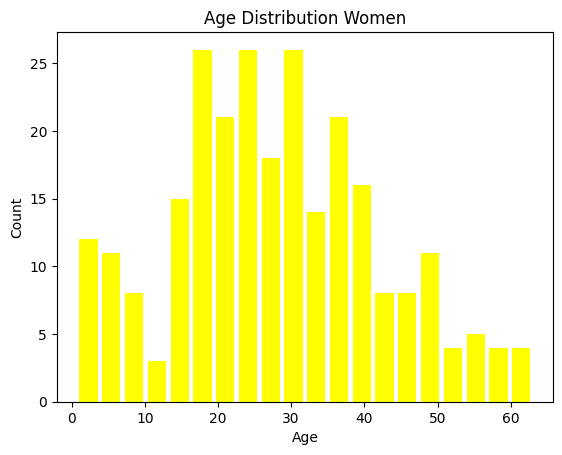

In [60]:
dff = df[df['Sex'] == "female"]
dff['Age'].plot.hist(bins=20,color="yellow",rwidth=0.8)
plt.title("Age Distribution Women")
plt.xlabel("Age")
plt.ylabel("Count")


Survived
0    549
1    342
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


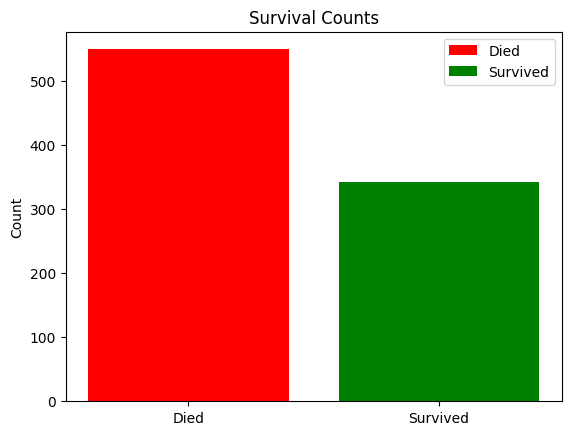

In [74]:
surv_countss = df["Survived"].value_counts()
print(surv_countss)
print(type(surv_countss)) # Series

plt.bar(0,surv_countss.loc[0], color="red", label="Died")
plt.bar(1,surv_countss.loc[1], color = "green", label = "Survived")

plt.title("Survival Counts")
plt.xticks([0,1],["Died", "Survived"])
plt.ylabel("Count")
plt.legend()
plt.show()

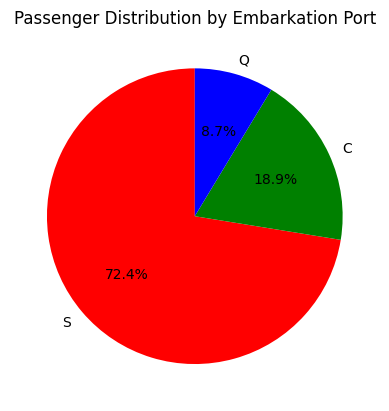

In [65]:
embarked_countss = df["Embarked"].value_counts()

plt.pie(
    embarked_countss,
    labels = embarked_countss.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['red','green','blue']
)

plt.title("Passenger Distribution by Embarkation Port")
plt.show()